<img src="Pol/Pol.001.png" style="width:100%;height:100%"/>  

<img src="Pol/Pol.002.png" style="width:100%;height:100%"/>  

<img src="Pol/Pol.003.png" style="width:100%;height:100%"/>  

<img src="Pol/Pol.004.png" style="width:100%;height:100%"/>  

<img src="Pol/Pol.005.png" style="width:100%;height:100%"/>  

<img src="Pol/Pol.006.png" style="width:100%;height:100%"/>  

<img src="Pol/Pol.007.png" style="width:100%;height:100%"/>  

<img src="Pol/Pol.008.png" style="width:100%;height:100%"/>  

<img src="Pol/Pol.009.png" style="width:100%;height:100%"/>  

<img src="Pol/Pol.010.png" style="width:100%;height:100%"/>  

<img src="Pol/Pol.011.png" style="width:100%;height:100%"/>  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import cmath

%matplotlib inline

In [ ]:
#N = 50
epsilon = 0.0
t = -0.5

cd1d=np.diag([epsilon for y in range(N)])

for i in range(N-1):
    cd1d[i][i+1]=t
    cd1d[i+1][i]=t
    
ecd1d=np.linalg.eigvalsh(cd1d)/np.abs(t)
x = [i for i in range(N)]

plt.figure(figsize=(4.5,4.5),dpi=105)
plt.scatter(x,ecd1d, s=2)
plt.xlabel('Atomic site')
plt.ylabel('Energy/t')
plt.title('One-dimensional chain');
plt.show()

<img src="Pol/Pol.012.png" style="width:100%;height:100%"/>  

<img src="Pol/Pol.013.png" style="width:100%;height:100%"/>  

In [258]:

#para valores de t1 cercanos a t2 las funciones de onda se deslocalizan
#t1=hopping intra-cell; t2=hopping inter-cell 

#t1 = 1.0 #t1=0.001 y t2=1 para funciondes deslocalizadas   
#t2 = 1.0

def ssh(N,t1,t2,ep):
    ssh=np.diag([ep if i%2 == 0 else -ep for i in range(N)])  
    for i in range(0,N-1,2):
        ssh[i][i+1]=t1
        ssh[i+1][i]=t1
    for i in range(1,N-1,2):
        ssh[i][i+1]=t2
        ssh[i+1][i]=t2
    ssh[0,N-1]=t2      #periodic boundary condition
    ssh[N-1,0]=t2      #periodic boundary condition
    sshe, sshv=np.linalg.eigh(ssh)
    x = [i for i in range(N)] #x = [i/(N-1) for i in range(N)]
    return x, sshe, sshv



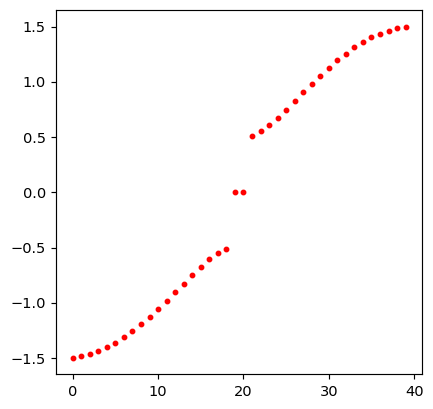

In [196]:
plt.figure(figsize=(4.5,4.5),dpi=105)
plt.plot(ssh(40,0.5,1.0,0.0)[0],ssh(40,0.5,1.0,0.0)[1],'.',color='red')
plt.show()

In [5]:
gama = np.linspace(-1.5, 1.5, 31)

epsilon =0.0

def ssh2(N,k):
    ssh=np.diag([epsilon for y in range(N)])
    for i in range(0,N-1,2):
        ssh[i][i+1]=gama[k]
        ssh[i+1][i]=gama[k]
    for i in range(1,N-1,2):
        ssh[i][i+1]=1.0
        ssh[i+1][i]=1.0
    vp=np.linalg.eigvalsh(ssh)
    return vp  

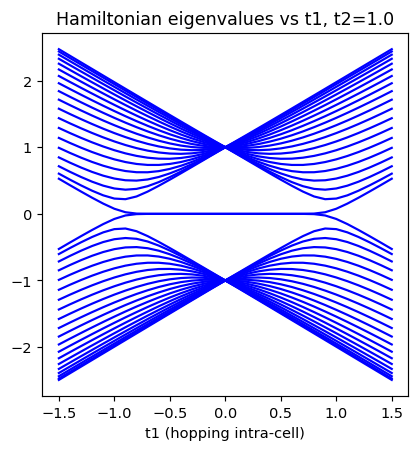

In [6]:
N=40
ed=np.array([ssh2(N,k) for k in range(len(gama))])

plt.figure(figsize=(4.5,4.5),dpi=105)
for i in range (N-1):
    plt.plot(gama,ed[:,i],'blue')

plt.xlabel('t1 (hopping intra-cell)')
plt.title('Hamiltonian eigenvalues vs t1, t2=1.0');
plt.show()

In [203]:
def pdf(N,t1,t2,ep,sit):
    psi2=np.abs(ssh(N,t1,t2,ep)[2][:,sit])**2
    
    plt.figure(figsize=(10,4),dpi=105)
    
    plt.subplot(1, 2, 1)
    plt.xlabel('Atomic site')
    plt.ylabel('Probability')
    plt.plot(ssh(N,t1,t2,ep)[0],psi2,'.-',color='blue')
    
    plt.subplot(1, 2, 2)
    plt.plot(ssh(N,t1,t2,ep)[0],ssh(N,t1,t2,ep)[1],'.',color='red')
    plt.xlabel('Atomic site')
    plt.ylabel('Energy/t')
    
    plt.subplots_adjust(wspace=0.3)
    plt.show() 
    

In [204]:
widgets.interactive(pdf,N=(20,100,20,),t1=(0.,1,0.25),t2=(1,1),ep=(0.0,0.0),sit=(0,N-1)) 


interactive(children=(IntSlider(value=60, description='N', min=20, step=20), FloatSlider(value=0.5, descriptio…

In [243]:
def ach(N,t1,t2,ep,n):
    cha=0.0
    for i in range(n):
        cha = cha + (np.abs(ssh(N,t1,t2,ep)[2][:,i]))**2
    return np.array([cha[i]+cha[i+1] for i in range(0,N,2)])

def cd(N,t1,t2,ep,n):    #charge density
    plt.rcParams["figure.figsize"] = (4.5,4.5)
    fig, ax = plt.subplots()
    plt.ylim([0.4,1.6])
    ax.set_xticks([i for i in range(0,N//2,2)])
    plt.plot(ach(N,t1,t2,ep,n),'o--',color='green')
    plt.xlabel('Unitary Cell')
    plt.ylabel('Charge Density')
    plt.show()
    

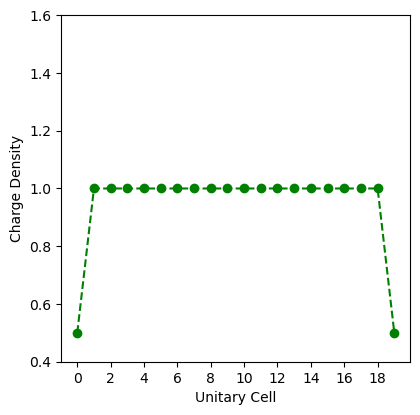

In [244]:
cd(40,0.001,1.0,0.0,19)

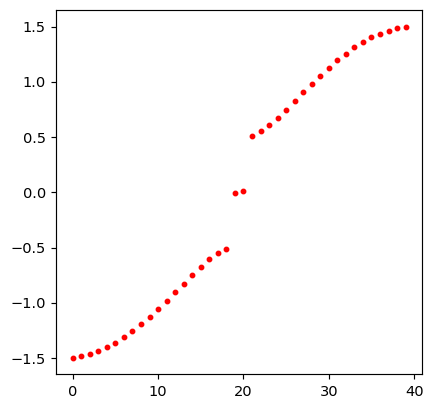

In [211]:
plt.figure(figsize=(4.5,4.5),dpi=105)
plt.plot(ssh(40,0.5,1.0,0.01)[0],ssh(40,0.5,1.0,0.01)[1],'.',color='red')
plt.show()

<img src="Pol/Pol.014.png" style="width:100%;height:100%"/>  

<img src="Pol/Pol.015.png" style="width:100%;height:100%"/>  

In [259]:
def pocc(N,t1,t2,ep):
    po=np.zeros((N,N))
    for i in range(N//2):
        po = po + np.dot(ssh(N,t1,t2,ep)[2][:,i].reshape(N,1),ssh(N,t1,t2,ep)[2][:,i].reshape(1,N))
    return po

In [260]:
#M is the number of unit cells. M=N/2, N beign the number of atom sites 
def ux(M):
    return np.diag(np.array([[np.exp(1j*2*np.pi*(i+1)/M),np.exp(1j*2*np.pi*(i+1)/M)] for i in range(M)]).reshape(1,2*M)[0].tolist())

In [261]:
def uxm(N,t1,t2,ep):
    return np.conjugate(pocc(N,t1,t2,ep)).T @ ux(N//2) @ pocc(N,t1,t2,ep)

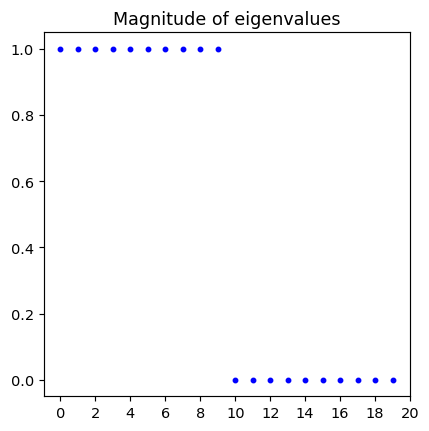

In [284]:
plt.figure(figsize=(4.5,4.5),dpi=105)
plt.plot(np.around(np.abs(np.linalg.eigvals(uxm(20,1.0,0.001,0.001))),decimals=3),'.',color='blue')
plt.xticks(np.arange(0,22,2))
plt.title('Magnitude of eigenvalues')
plt.show()

<img src="Pol/Pol.016.png" style="width:100%;height:100%"/>  

In [262]:
cw0=np.around(np.angle(np.linalg.eigvals(uxm(20,0.001,1.0,0.001)))/(2*np.pi),decimals=3)
cw1=np.sort(cw0[:10])

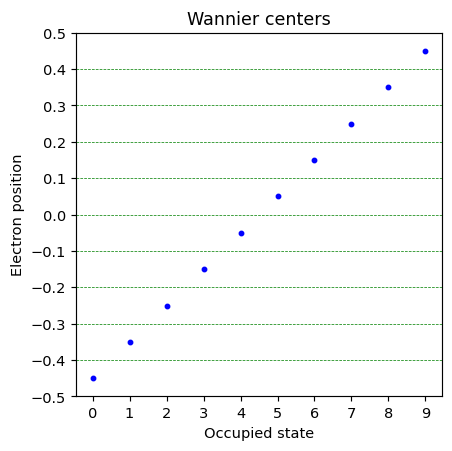

In [286]:

plt.figure(figsize=(4.5,4.5),dpi=105)
plt.xticks(np.arange(0,11,1))
plt.plot(cw1,'.',color='blue')
plt.yticks(np.arange(-0.5,0.6,0.1))
plt.ylim(-0.5,0.5)
plt.xlabel('Occupied state')
plt.ylabel('Electron position')
plt.title('Wannier centers')
plt.grid(axis='y',color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()

<img src="Pol/Pol.017.png" style="width:100%;height:100%"/>  